In [1]:
import matplotlib.pyplot as plt
#from healpy.newvisufunc import projview, newprojplot
import numpy as np
import healpy as hp
import scipy as spm = hp.read_map("COM_CMB_IQU-commander_2048_R3.00_full.fits", field = 5)
N = len(m)






print(N)
hp.pixelfunc.get_nside(m)
50331648
2048
hp.projview(m);

from scipy.special import eval_legendre

In [2]:
m = hp.read_map("COM_CMB_IQU-commander_2048_R3.00_full.fits", field = 5)
N = len(m)

In [3]:
print(N)
hp.pixelfunc.get_nside(m)

50331648


2048

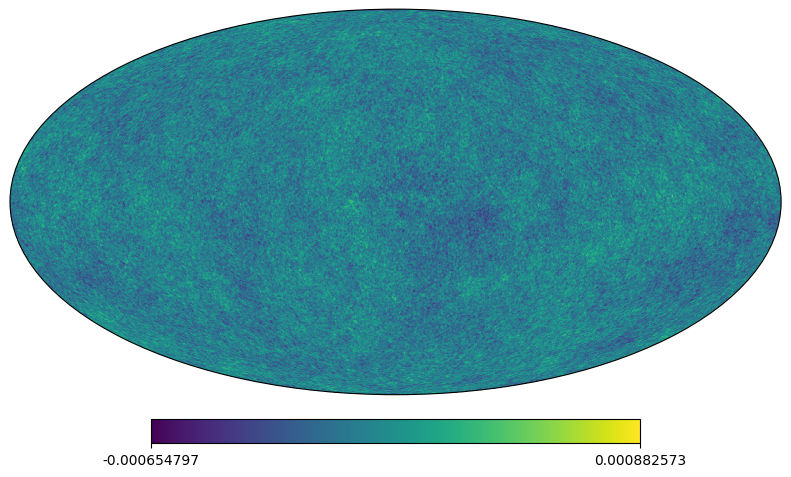

In [4]:
hp.projview(m);

In [5]:
#media e varianza della mappa

print("Mean of map: mean_deltaT/T =",np.mean(m),"microK")
print("Variance of map var_deltaT/T =",np.var(m),"microK")

Mean of map: mean_deltaT/T = -2.1594802e-07 microK
Variance of map var_deltaT/T = 1.1614202e-08 microK


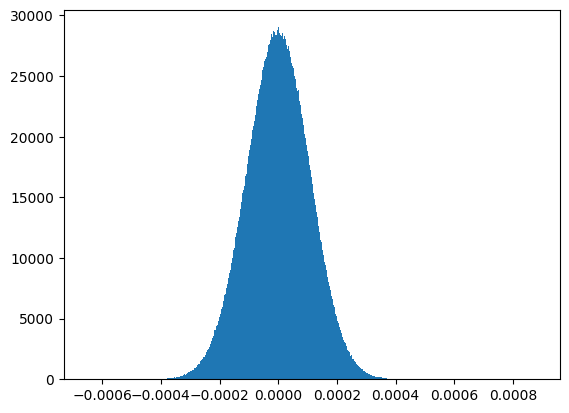

In [6]:
#istogramma della variazione di temperatura della mappa

plt.hist(m, bins=10000)
plt.show()

In [7]:
#skewness e kurtosis della distribuzione della variazione di temperatura della mappa

sk = sp.stats.skew(m)
ku = sp.stats.kurtosis(m)

print("Skewness of map's data: Sk_deltaT/T = ",sk)
print("Kurtosis of map's data: Ku_deltaT/T = ",ku)

Skewness of map's data: Sk_deltaT/T =  -0.020298298340478874
Kurtosis of map's data: Ku_deltaT/T =  0.015378739138219633


In [8]:
#si ricavano coefficienti c_l e a_lm per L=5

coeff_armoniche5 = hp.anafast(m, lmax = 5, alm=True)
cl_Lmax5 = np.asarray(coeff_armoniche5[0:1])
a_lm_Lmax5 = np.asarray(coeff_armoniche5[1:2])

In [9]:
Re_alm_Lmax5 = [num.real for num in a_lm_Lmax5]
Im_alm_Lmax5 = [num.imag for num in a_lm_Lmax5]
Re_alm_Lmax5_ar = np.asarray(Re_alm_Lmax5)
Im_alm_Lmax5_ar = np.asarray(Im_alm_Lmax5)
lmax_5 = hp.sphtfunc.Alm.getlm(5)
lmax_5_L = np.asarray(lmax_5[0:1])
lmax_5_M = np.asarray(lmax_5[1:2])

a_5m = []
mod_a_5m = []
index_a5m = []
re_a5m = []
im_a5m = []

for i in range(0, lmax_5_L.size):
    if (lmax_5_L[0,i] == 5):
        a_5m.append(a_lm_Lmax5[0,i])
        mod_a_5m.append((np.abs(a_lm_Lmax5[0,i]))**2)
        index_a5m.append(lmax_5_M[0,i])
        re_a5m.append(Re_alm_Lmax5_ar[0,i])
        im_a5m.append(Im_alm_Lmax5_ar[0,i])

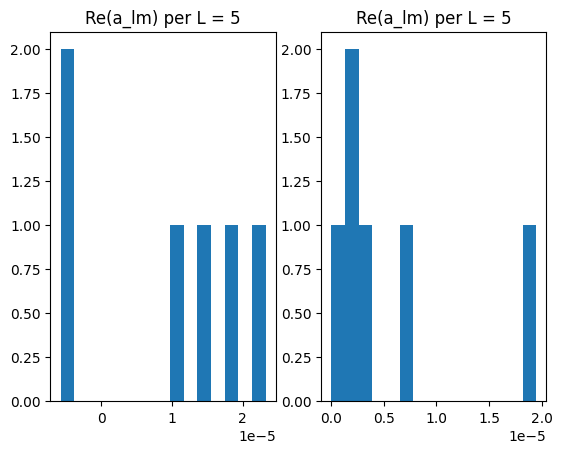

In [10]:
#distribuzione di parte reale e immaginaria degli a_lm per L=5

fig, axs = plt.subplots(1,2)
axs[0].hist(re_a5m, bins=15)
axs[0].set_title('Re(a_lm) per L = 5');
axs[1].hist(im_a5m, bins=15)
axs[1].set_title('Re(a_lm) per L = 5');

In [11]:
#si ricavano coefficienti c_l e a_lm per L=500

coeff_armoniche500 = hp.anafast(m, lmax = 500, alm=True)
cl_Lmax500 = np.asarray(coeff_armoniche500[0:1])
a_lm_Lmax500 = np.asarray(coeff_armoniche500[1:2])

In [12]:
Re_alm_Lmax500 = [num.real for num in a_lm_Lmax500]
Im_alm_Lmax500 = [num.imag for num in a_lm_Lmax500]
Re_alm_Lmax500_ar = np.asarray(Re_alm_Lmax500)
Im_alm_Lmax500_ar = np.asarray(Im_alm_Lmax500)

lmax_500 = hp.sphtfunc.Alm.getlm(500)

lmax_500_L = np.asarray(lmax_500[0:1])
lmax_500_M = np.asarray(lmax_500[1:2])
a_500m = []
mod_a_500m = []
index_a500m = []
re_a500m = []
im_a500m = []

for i in range(0, lmax_500_L.size):
    if (lmax_500_L[0,i] == 500):
        a_500m.append(a_lm_Lmax500[0,i])
        mod_a_500m.append((np.abs(a_lm_Lmax500[0,i]))**2)
        index_a500m.append(lmax_500_M[0,i])
        re_a500m.append(Re_alm_Lmax500_ar[0,i])
        im_a500m.append(Im_alm_Lmax500_ar[0,i])

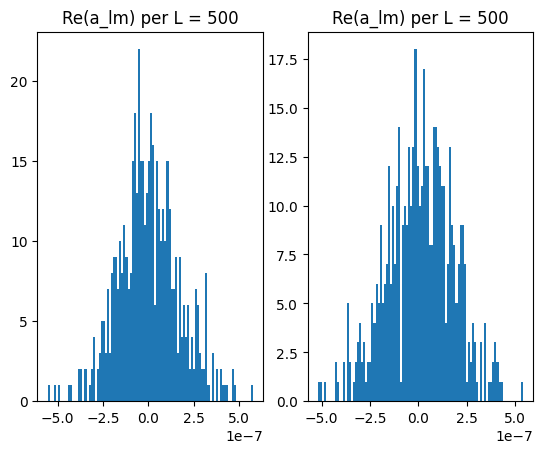

In [13]:
#distribuzione di parte reale e immaginaria degli a_lm per L=500

fig, axs = plt.subplots(1,2)
axs[0].hist(re_a500m, bins=100)
axs[0].set_title('Re(a_lm) per L = 500');
axs[1].hist(im_a500m, bins=100)
axs[1].set_title('Re(a_lm) per L = 500');

In [14]:
#si ricavano i c_l fermandosi a L=2500

coeff_armoniche2500 = hp.anafast(m, lmax = 2500, alm=True)
#cl_Lmax2500 = np.asarray(coeff_armoniche2500)
cl_Lmax2500 = np.asarray(coeff_armoniche2500[0:1])
a_lm_Lmax2500 = np.asarray(coeff_armoniche2500[1:2])

In [15]:
index_cl_2500 = []

cl_2500 = []
cl2500 = np.asarray(cl_2500)
for i in range(0, cl_Lmax2500.size):
    index_cl_2500.append(i)
    cl_2500.append((1/(2*np.pi))*i*(i+1)*cl_Lmax2500[0,i])
    
index_cl2500 = np.asarray(index_cl_2500)
cl2500 = np.asarray(cl_2500)

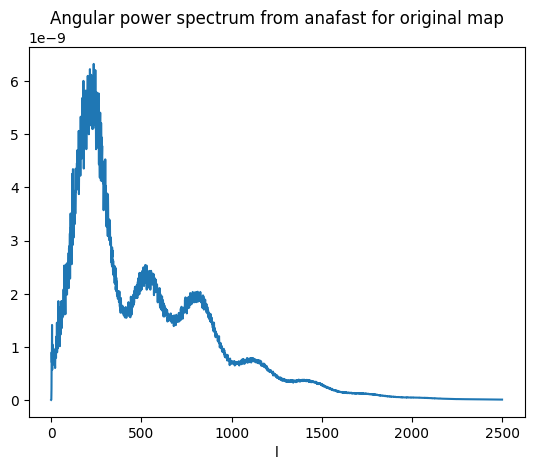

In [16]:
#grafico spettro di potenza angolare in funzione del multiplo l

plt.plot(index_cl_2500, cl2500)
plt.title("Angular power spectrum from anafast for original map");
plt.xlabel("l");

In [17]:
print(cl_Lmax2500)

[[5.86015930e-13 1.18760510e-11 2.23246097e-10 ... 6.31958418e-18
  6.30493429e-18 6.10313221e-18]]


In [18]:
lmax = 2500
cl_from_mean = []

for l in range(0, lmax+1):
    sum = 0.
    for x in range(-lmax,lmax+1):
        sum = sum + (abs(a_lm_Lmax2500[0,hp.sphtfunc.Alm.getidx(2500,l,abs(x))]))**2
    cl_from_mean.append((l*(l+1)*sum/((2*l+1)*2*np.pi)))

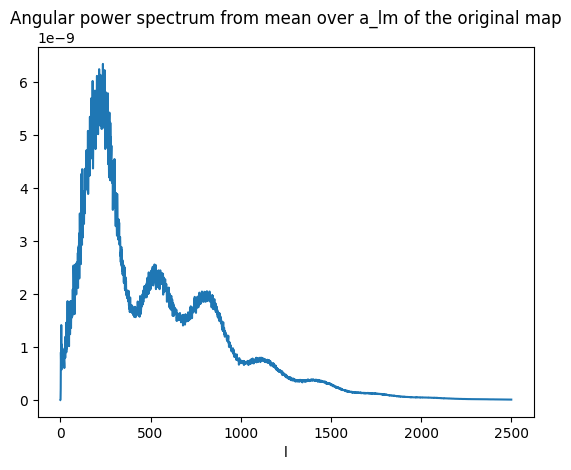

In [19]:
plt.plot(index_cl_2500, cl_from_mean);
plt.title("Angular power spectrum from mean over a_lm of the original map");
plt.xlabel("l");

In [20]:
#funzione di correlazione

cos_teta = np.linspace(-0.999, 0.999, 2000)
w = []

for i in range(0, cos_teta.size): # for th in theta
    sum = 0.
    #l = 0
    for j in range(0, cl_Lmax2500.size):
        sum = sum + (2*j+1)*cl_Lmax2500[0,j]*sp.special.eval_legendre(j,cos_teta[i])
        #print(l,j)
        #l = l+1
        
    
    w.append((1./(4*np.pi))*sum)
teta = np.arccos(cos_teta)
    
w_array = np.array(w)

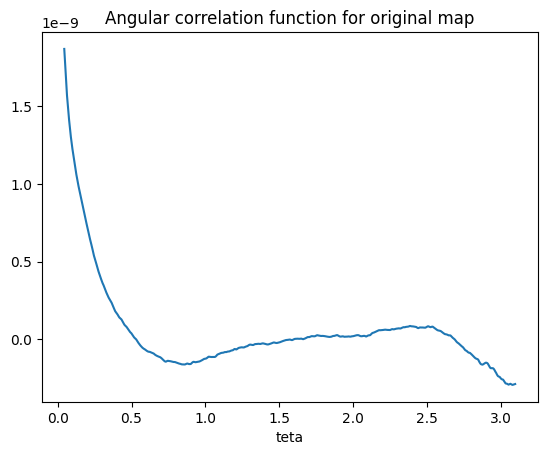

In [21]:
plt.plot(teta, w_array)
plt.title("Angular correlation function for original map");
plt.xlabel("teta");
#plt.xscale('log')
#plt.yscale('log')

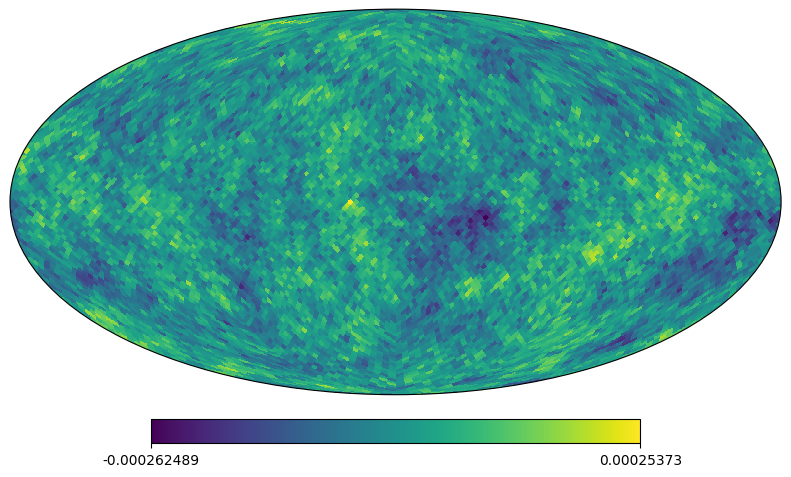

In [22]:
NSIDE = 32
m_32 = hp.pixelfunc.ud_grade(m, NSIDE)
hp.projview(m_32);

In [23]:
ang_size32 = hp.pixelfunc.nside2resol(NSIDE)
print("L'apertura angolare approssimativa di ogni pixel è per NSIDE =",NSIDE,":", ang_size32)

L'apertura angolare approssimativa di ogni pixel è per NSIDE = 32 : 0.031978959623327766


In [37]:
#si ricavano i c_l fermandosi a L=2500
l_max_32 = 220
coeff_armoniche300_32 = hp.anafast(m_32, lmax = l_max_32, alm=True)
#cl_Lmax2500 = np.asarray(coeff_armoniche2500)
cl_Lmax300_32 = np.asarray(coeff_armoniche300_32[0:1])
a_lm_Lmax300_32 = np.asarray(coeff_armoniche300_32[1:2])

In [38]:
index_cl_300_32 = []

cl_300_32 = []
cl300_32 = np.asarray(cl_300_32)
for i in range(0, l_max_32):
    index_cl_300_32.append(i)
    cl_300_32.append((1/(2*np.pi))*i*(i+1)*cl_Lmax300_32[0,i])
    
index_cl300_32 = np.asarray(index_cl_300_32)
cl300_32 = np.asarray(cl_300_32)

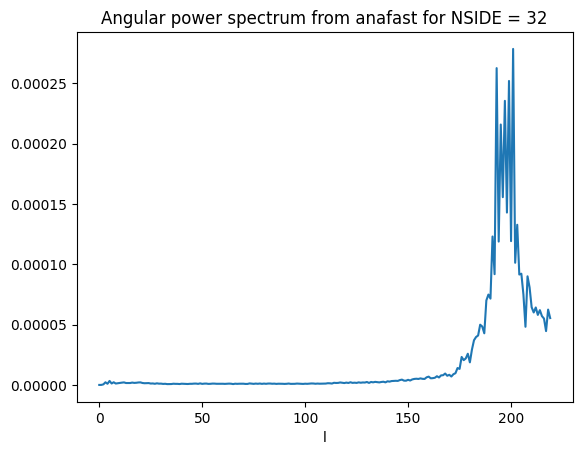

In [39]:
#grafico spettro di potenza angolare in funzione del multiplo l

plt.plot(index_cl_300_32, cl300_32)
plt.title("Angular power spectrum from anafast for NSIDE = 32");
plt.xlabel("l");
#plt.xlim((0,300))

In [40]:
#funzione di correlazione

cos_teta = np.linspace(-0.999, 0.999, 1000)
w_32 = []
#teta = 0.03
for i in range(0, cos_teta.size): # for th in theta
    sum = 0.
    l = 0.
    for j in range(0, l_max_32):
        sum = sum + (2*l+1)*cl_Lmax300_32[0,j]*sp.special.eval_legendre(l,cos_teta[i])
        
        l = l+1
    
    w_32.append((1./(4*np.pi))*sum)
    
teta = np.arccos(cos_teta)
    
w_32_array = np.array(w_32)

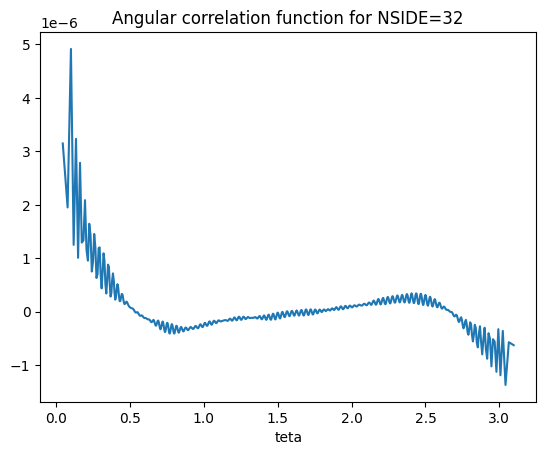

In [41]:
plt.plot(teta, w_32_array)
plt.title("Angular correlation function for NSIDE=32");
plt.xlabel("teta");
#plt.xscale('log')
#plt.yscale('log')

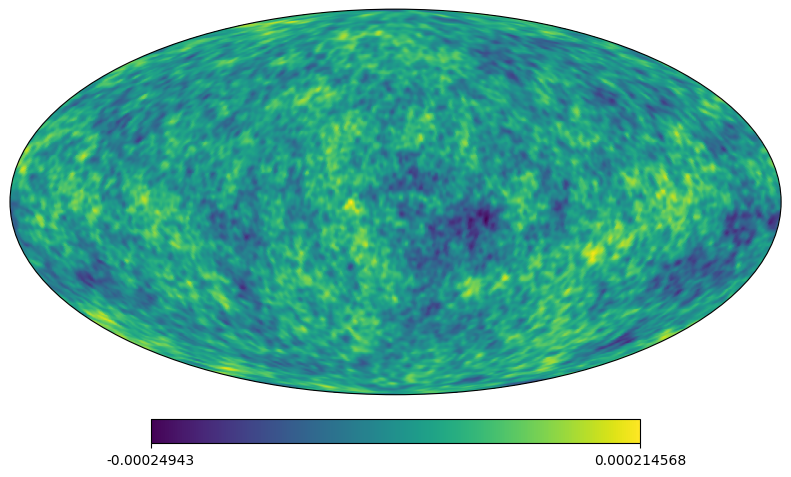

In [42]:
NSIZE_original = hp.pixelfunc.get_nside(m)
m_smooth = hp.sphtfunc.smoothing(m, ang_size32)
hp.projview(m_smooth);

In [43]:
#si ricavano i c_l fermandosi a L=2500

coeff_armoniche2500_smooth = hp.anafast(m_smooth, lmax = 2500, alm=True)
#cl_Lmax2500 = np.asarray(coeff_armoniche2500)
cl_Lmax2500_smooth = np.asarray(coeff_armoniche2500_smooth[0:1])
a_lm_Lmax2500_smooth = np.asarray(coeff_armoniche2500_smooth[1:2])

In [44]:
index_cl_2500_smooth = []

cl_2500_smooth = []
cl2500_smooth = np.asarray(cl_2500_smooth)
for i in range(0, cl_Lmax2500.size):
    index_cl_2500_smooth.append(i)
    cl_2500_smooth.append((1/(2*np.pi))*i*(i+1)*cl_Lmax2500_smooth[0,i])
    
index_cl2500_smooth = np.asarray(index_cl_2500_smooth)
cl2500_smooth = np.asarray(cl_2500_smooth)

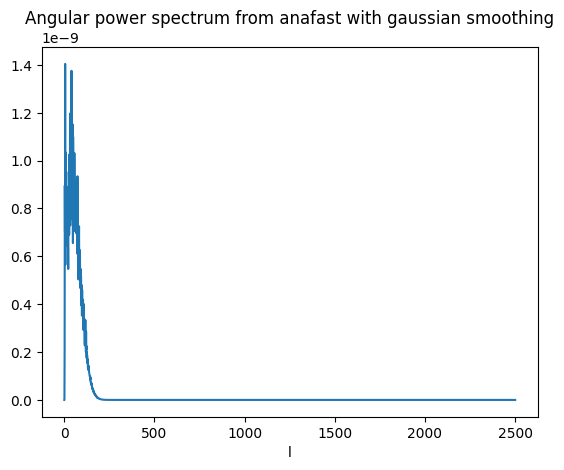

In [45]:
#grafico spettro di potenza angolare in funzione del multiplo l

plt.plot(index_cl_2500_smooth, cl2500_smooth)
plt.title("Angular power spectrum from anafast with gaussian smoothing");
plt.xlabel("l");
#plt.xlim((0,200))

In [46]:
#funzione di correlazione

cos_teta = np.linspace(0., 0.999, 1000)
w_smooth = []
#teta = 0.03
for i in range(0, cos_teta.size): # for th in theta
    sum = 0.
    l = 0.
    for j in range(0, cl_Lmax2500.size):
        sum = sum + (2*l+1)*cl_Lmax2500_smooth[0,j]*sp.special.eval_legendre(l,cos_teta[i])
        
        l = l+1
    
    w_smooth.append((1./(4*np.pi))*sum)

teta = np.arccos(cos_teta)    
    
w_smooth_array = np.array(w_smooth)

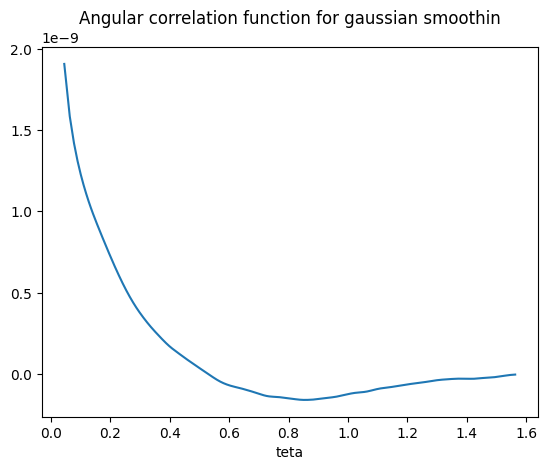

In [47]:
plt.plot(teta, w_smooth_array)
plt.title("Angular correlation function for gaussian smoothin");
plt.xlabel("teta");
#plt.xscale('log')
#plt.yscale('log')

In [50]:
# print("normale",coeff_armoniche2500)
# print("smooth",coeff_armoniche2500_smooth)
# print("32", coeff_armoniche300_32)